# 1. Importing Lib

In [8]:
# Importing Lib
import glob
import pandas as pd
import os
import json
import os.path


# Checking working derectory.

In [3]:
pwd

'g:\\SPU\\670\\670_Capstone_Project\\src'

# 2. Reading Data 


In [9]:
#Giving Path of the data.

path = 'data\\raw_api_data'
path_location_details = path + '\\**\\'
print(path)
print(os.path.join(path_location_details,'*.csv'))

data\raw_api_data
data\raw_api_data\**\*.csv


In [10]:
# Reading CSV files from the given path.
csv_files = glob.glob(os.path.join(path_location_details,'*.csv'))
len(csv_files)

55

In [11]:
# Concating all files into one file.
df_header_details = pd.read_csv(csv_files[0])
df_meta_data_details = df_header_details.head(1)

In [12]:
df_meta_data_details

,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,...,Cloud Type 11,Cloud Type 12,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Surface Albedo Units,Version
0,NSRDB,1091166,-,-,-,42.89,-78.86,-5,197,-5,...,Dust,Smoke,NaN,Missing Image,Low Irradiance,Exceeds Clearsky,Missing CLoud Properties,Rayleigh Violation,NaN,3.0.6


## Creating new json file for the header Each region wise.

In [13]:
# text = 'Python: Cut of the last word of a sentence?'
# text[text.rfind(' '):]

# Collecting each location details and storing into json file.

In [14]:
# Concating all files into one file.
for file in csv_files:
    sz = os.path.getsize(file)
    if sz > 1000:
        # foldersName = ' '.join(file.split('\\')[:-1])
        foldersName = file[:file.rfind('\\')]
        # print(foldersName)
        location_details_path = f'{foldersName}\location_Details.json'
        is_exists = os.path.exists(location_details_path)
        # print(is_exists)
        if not is_exists:
            
            # print(f'In side the condition : {is_exists}')
            reading_header = pd.read_csv(file).head(1)
            dict_meta_data_details = reading_header.to_dict(orient='records')
            # print(location_details_path)
            with open(location_details_path, 'w') as json_file:
                json.dump(dict_meta_data_details, json_file)



In [15]:
# dict_meta_data_details = df_meta_data_details.to_dict(orient='records')
# print(dict_meta_data_details)
# with open('config.json', 'w') as json_file:
#     json.dump(dict_meta_data_details, json_file)


# csv_files = glob.glob(os.path.join(path,'*.json'))
# with open('config.json') as json_file:
#     details = json.load(json_file)

# print(json.dumps(details, indent = 1))

## 2.1 Reading Multiple file and Concatinating into one df.

In [16]:

for file in os.listdir(path):
    region_path = os.path.join(path, file)
    if os.path.isdir(region_path):
        # print(region_path)
        location_details_path = f'{region_path}\location_Details.json'
        is_exists = os.path.exists(location_details_path)
        if is_exists:
            region_csv_files = glob.glob(os.path.join(region_path,'*.csv'))
            for concate in region_csv_files:
                 if "_concat.csv" in concate:
                    region_csv_files.remove(concate)
                    print(concate)

            region_csv_concat = pd.concat([pd.read_csv(file, skiprows=1, header=1) for file in region_csv_files ], ignore_index=True)
            concat_file_name = region_path[region_path.rfind('\\'):]
            concat_file_name = (f"{region_path}/{concat_file_name[1:]}_concat.csv")
            region_csv_concat.to_csv(concat_file_name, index=False)
        
        

data\raw_api_data\Buffalo, New York, United States\Buffalo, New York, United States_concat.csv
data\raw_api_data\Colorado Springs, Colorado, United States\Colorado Springs, Colorado, United States_concat.csv
data\raw_api_data\Jersey City, New Jersey, United States\Jersey City, New Jersey, United States_concat.csv
data\raw_api_data\Los Angeles, California, United States\Los Angeles, California, United States_concat.csv
data\raw_api_data\San Diego, Texas, United States\San Diego, Texas, United States_concat.csv


## Geting Concat file name for skiping while concat process.

In [112]:
print(path_location_details)
region_concat_csv_files = glob.glob(os.path.join(path_location_details,'*_concat.csv'))

region_concat_csv_files

data\raw_api_data\**\


['data\\raw_api_data\\Buffalo, New York, United States\\Buffalo, New York, United States_concat.csv',
 'data\\raw_api_data\\Colorado Springs, Colorado, United States\\Colorado Springs, Colorado, United States_concat.csv',
 'data\\raw_api_data\\Jersey City, New Jersey, United States\\Jersey City, New Jersey, United States_concat.csv',
 'data\\raw_api_data\\Los Angeles, California, United States\\Los Angeles, California, United States_concat.csv',
 'data\\raw_api_data\\San Diego, Texas, United States\\San Diego, Texas, United States_concat.csv']

# Concat all file while working with single folders and single region.

In [7]:
# Concating all files into one file.
region_concat_csv_files = glob.glob(os.path.join('data/raw_data','*_concat.csv'))
print(region_concat_csv_files)
csv_concat = pd.concat([pd.read_csv(file, skiprows=1, header=1) for file in csv_files ], ignore_index=True)
csv_concat

[]


In [82]:
csv_concat.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'DHI', 'DNI', 'GHI',
       'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type',
       'Dew Point', 'Solar Zenith Angle', 'Fill Flag', 'Surface Albedo',
       'Wind Speed', 'Precipitable Water', 'Wind Direction',
       'Relative Humidity', 'Temperature', 'Pressure'],
      dtype='object')

## 2.2 Save the Concanited DF as a new CSV File.
 we do not have to perform concatination step multiple time until we adding new data.

In [51]:
# Save Concat data frame into one CSV file.
csv_concat.to_csv('data/updated_data/solar_radiation_2018_to_2021_01.csv', index=False)

## 2.3 Reading concat file for single location so we can skip the process of the concat all time.

In [52]:
# Read the Concated CSV File.
# solar_file = pd.read_csv('data/solar_radiation_2018_to_2021_01.csv', header=1)
solar_file = pd.read_csv('data/updated_data/solar_radiation_2018_to_2021_01.csv')
solar_file

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,...,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
0,2018,1,1,0,30,0,0,0,0,0,...,-4.3,175.02,0,0.16,6.2,2.5,12,62.39,2.2,1023
1,2018,1,1,1,30,0,0,0,0,0,...,-5.2,167.00,0,0.16,6.1,2.4,11,60.74,1.6,1023
2,2018,1,1,2,30,0,0,0,0,0,...,-6.0,153.97,0,0.16,6.0,2.4,10,59.31,1.1,1024
3,2018,1,1,3,30,0,0,0,0,0,...,-6.6,140.70,0,0.16,5.9,2.5,11,58.34,0.7,1024
4,2018,1,1,4,30,0,0,0,0,0,...,-6.8,127.51,0,0.16,6.0,2.5,11,58.72,0.3,1024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2021,12,31,19,30,0,0,0,0,0,...,-1.0,111.77,0,0.16,6.7,1.3,282,63.77,5.3,1002
35036,2021,12,31,20,30,0,0,0,0,0,...,-0.7,124.71,0,0.16,6.3,1.4,283,68.14,4.7,1002
35037,2021,12,31,21,30,0,0,0,0,0,...,-0.4,137.87,0,0.16,5.9,1.4,284,71.04,4.4,1002
35038,2021,12,31,22,30,0,0,0,0,0,...,-0.2,151.12,0,0.16,5.5,1.4,283,72.88,4.2,1002


# 3. Data Preprocessing and Data Cleaning 

In [53]:
# Printing Columns Names
solar_file.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'DHI', 'DNI', 'GHI',
       'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type',
       'Dew Point', 'Solar Zenith Angle', 'Fill Flag', 'Surface Albedo',
       'Wind Speed', 'Precipitable Water', 'Wind Direction',
       'Relative Humidity', 'Temperature', 'Pressure'],
      dtype='object')

## 3.1 create new TimeStame Column using Year, Month, Day, Hours, and Minute.

In [54]:
# Create new Column TimeStamps using Year,month,day,hour and minute coulumn and drop that column.
solar_file_01 = solar_file.copy()
solar_file_01['TimeStamp'] = pd.to_datetime(solar_file[['Year','Month','Day']])
solar_file_01.drop(['Minute'], inplace=True, axis=1)
solar_file_01

,Year,Month,Day,Hour,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,...,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,TimeStamp
0,2018,1,1,0,0,0,0,0,0,0,...,175.02,0,0.16,6.2,2.5,12,62.39,2.2,1023,2018-01-01
1,2018,1,1,1,0,0,0,0,0,0,...,167.00,0,0.16,6.1,2.4,11,60.74,1.6,1023,2018-01-01
2,2018,1,1,2,0,0,0,0,0,0,...,153.97,0,0.16,6.0,2.4,10,59.31,1.1,1024,2018-01-01
3,2018,1,1,3,0,0,0,0,0,0,...,140.70,0,0.16,5.9,2.5,11,58.34,0.7,1024,2018-01-01
4,2018,1,1,4,0,0,0,0,0,0,...,127.51,0,0.16,6.0,2.5,11,58.72,0.3,1024,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2021,12,31,19,0,0,0,0,0,0,...,111.77,0,0.16,6.7,1.3,282,63.77,5.3,1002,2021-12-31
35036,2021,12,31,20,0,0,0,0,0,0,...,124.71,0,0.16,6.3,1.4,283,68.14,4.7,1002,2021-12-31
35037,2021,12,31,21,0,0,0,0,0,0,...,137.87,0,0.16,5.9,1.4,284,71.04,4.4,1002,2021-12-31
35038,2021,12,31,22,0,0,0,0,0,0,...,151.12,0,0.16,5.5,1.4,283,72.88,4.2,1002,2021-12-31


Moving TimeStamp Column to the first place.

insert column using insert(position,column_name,first_column) function

In [55]:
first_column = solar_file_01.pop('TimeStamp')

solar_file_01.insert(0, 'TimeStamp', first_column)
solar_file_01

,TimeStamp,Year,Month,Day,Hour,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,...,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
0,2018-01-01,2018,1,1,0,0,0,0,0,0,...,-4.3,175.02,0,0.16,6.2,2.5,12,62.39,2.2,1023
1,2018-01-01,2018,1,1,1,0,0,0,0,0,...,-5.2,167.00,0,0.16,6.1,2.4,11,60.74,1.6,1023
2,2018-01-01,2018,1,1,2,0,0,0,0,0,...,-6.0,153.97,0,0.16,6.0,2.4,10,59.31,1.1,1024
3,2018-01-01,2018,1,1,3,0,0,0,0,0,...,-6.6,140.70,0,0.16,5.9,2.5,11,58.34,0.7,1024
4,2018-01-01,2018,1,1,4,0,0,0,0,0,...,-6.8,127.51,0,0.16,6.0,2.5,11,58.72,0.3,1024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2021-12-31,2021,12,31,19,0,0,0,0,0,...,-1.0,111.77,0,0.16,6.7,1.3,282,63.77,5.3,1002
35036,2021-12-31,2021,12,31,20,0,0,0,0,0,...,-0.7,124.71,0,0.16,6.3,1.4,283,68.14,4.7,1002
35037,2021-12-31,2021,12,31,21,0,0,0,0,0,...,-0.4,137.87,0,0.16,5.9,1.4,284,71.04,4.4,1002
35038,2021-12-31,2021,12,31,22,0,0,0,0,0,...,-0.2,151.12,0,0.16,5.5,1.4,283,72.88,4.2,1002


Checking For the NULL Data.

In [56]:
solar_file_01.isna().sum()

TimeStamp             0
Year                  0
Month                 0
Day                   0
Hour                  0
DHI                   0
DNI                   0
GHI                   0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Solar Zenith Angle    0
Fill Flag             0
Surface Albedo        0
Wind Speed            0
Precipitable Water    0
Wind Direction        0
Relative Humidity     0
Temperature           0
Pressure              0
dtype: int64

Checking for the duplicate Data

In [57]:
solar_file_01.duplicated().sum()

0

In [58]:
solar_file_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   TimeStamp           35040 non-null  datetime64[ns]
 1   Year                35040 non-null  int64         
 2   Month               35040 non-null  int64         
 3   Day                 35040 non-null  int64         
 4   Hour                35040 non-null  int64         
 5   DHI                 35040 non-null  int64         
 6   DNI                 35040 non-null  int64         
 7   GHI                 35040 non-null  int64         
 8   Clearsky DHI        35040 non-null  int64         
 9   Clearsky DNI        35040 non-null  int64         
 10  Clearsky GHI        35040 non-null  int64         
 11  Cloud Type          35040 non-null  int64         
 12  Dew Point           35040 non-null  float64       
 13  Solar Zenith Angle  35040 non-null  float64   

In [59]:
solar_file_01.nunique()

TimeStamp              1460
Year                      4
Month                    12
Day                      31
Hour                     24
DHI                     504
DNI                    1027
GHI                    1041
Clearsky DHI            341
Clearsky DNI           1022
Clearsky GHI           1037
Cloud Type               10
Dew Point               408
Solar Zenith Angle    14025
Fill Flag                 5
Surface Albedo            5
Wind Speed              105
Precipitable Water       71
Wind Direction          361
Relative Humidity      7652
Temperature             468
Pressure                 45
dtype: int64

## 3.2 Drop Null Data
Use to Clean Data Befor when we are facing issue realted to Two Header.

In [60]:
# Checking for the null column and droping it.
# solar_file_01.dropna(axis=1, inplace=True)
# solar_file_01

In [61]:
# saving to new csv file after droping.
# solar_file_01.to_csv('data/updated_data/final_solar.csv', index=False)

In [62]:
# df_solar = pd.read_csv('data/updated_data/final_solar.csv')

In [63]:
solar_file_01

,TimeStamp,Year,Month,Day,Hour,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,...,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
0,2018-01-01,2018,1,1,0,0,0,0,0,0,...,-4.3,175.02,0,0.16,6.2,2.5,12,62.39,2.2,1023
1,2018-01-01,2018,1,1,1,0,0,0,0,0,...,-5.2,167.00,0,0.16,6.1,2.4,11,60.74,1.6,1023
2,2018-01-01,2018,1,1,2,0,0,0,0,0,...,-6.0,153.97,0,0.16,6.0,2.4,10,59.31,1.1,1024
3,2018-01-01,2018,1,1,3,0,0,0,0,0,...,-6.6,140.70,0,0.16,5.9,2.5,11,58.34,0.7,1024
4,2018-01-01,2018,1,1,4,0,0,0,0,0,...,-6.8,127.51,0,0.16,6.0,2.5,11,58.72,0.3,1024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2021-12-31,2021,12,31,19,0,0,0,0,0,...,-1.0,111.77,0,0.16,6.7,1.3,282,63.77,5.3,1002
35036,2021-12-31,2021,12,31,20,0,0,0,0,0,...,-0.7,124.71,0,0.16,6.3,1.4,283,68.14,4.7,1002
35037,2021-12-31,2021,12,31,21,0,0,0,0,0,...,-0.4,137.87,0,0.16,5.9,1.4,284,71.04,4.4,1002
35038,2021-12-31,2021,12,31,22,0,0,0,0,0,...,-0.2,151.12,0,0.16,5.5,1.4,283,72.88,4.2,1002


In [64]:
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pylab as plt


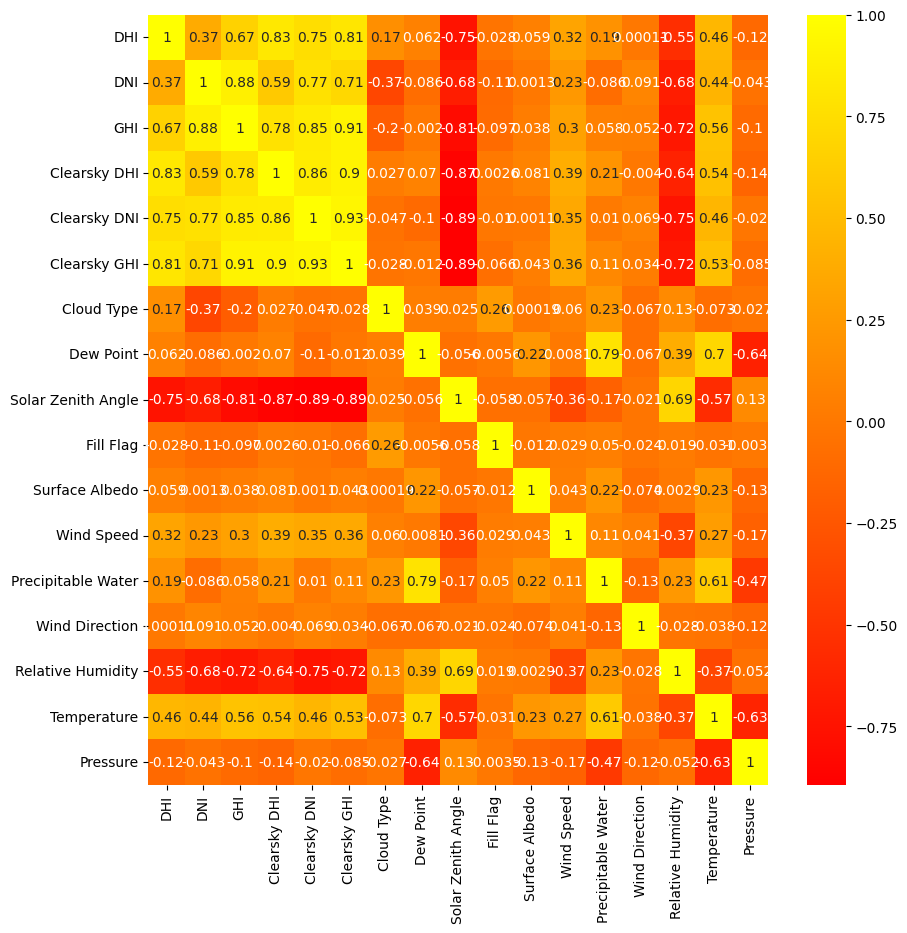

In [80]:

plt.figure(figsize = (10,10))
ax = sns.heatmap(solar_file_01.iloc[:,5:].corr(), cmap="autumn", annot=True)
plt.show()

In [ ]:
# from powerbiclient import Report, models
# from msrest.authentication import DeviceCodeCredentials
# import pandas as pd

# # Authenticate with Power BI
# credentials = DeviceCodeCredentials(client_id="<your-client-id>")

# # Load Power BI report
# report = Report(
#     workspace_id="<your-workspace-id>",
#     report_id="<your-report-id>",
#     credentials=credentials
# )

# # Get default report page
# page = report.get_page()

# # Create bar chart visual
# data = pd.read_csv('data.csv')
# visual = page.visuals.add(models.VisualRequest(
#     "barChart",
#     "Sales by Category",
#     [{"data": data}],
#     {"showLegend": "true"}
# ))

# # Render visual
# visual.render()
